In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as stats
import pandas.plotting as pd_plot

In [2]:
#  Reading in the Cleaned Dataset and looking at the statistical
DatabaseDF = pd.read_csv("../CleanedDataset.csv")
DatabaseDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10856.0,5.427500e+03,3.134002e+03,0.000000,2.713750e+03,5.427500e+03,8.141250e+03,1.085500e+04
Lateral Length,10848.0,8.914655e+03,1.833824e+03,3.000000,8.916000e+03,9.427000e+03,9.799000e+03,2.223100e+04
Stages,10688.0,2.799775e+01,1.098972e+01,1.000000,2.200000e+01,3.000000e+01,3.400000e+01,9.400000e+01
Township,10856.0,1.521737e+02,4.829458e+00,139.000000,1.490000e+02,1.520000e+02,1.550000e+02,1.640000e+02
Range,10856.0,9.591489e+01,3.479933e+00,89.000000,9.300000e+01,9.600000e+01,9.900000e+01,1.050000e+02
Section,10856.0,1.819805e+01,1.044430e+01,1.000000,9.000000e+00,1.800000e+01,2.700000e+01,3.600000e+01
"Total Prop, lbs",10856.0,3.332069e+06,2.364422e+06,0.000000,1.999804e+06,2.958260e+06,3.879750e+06,2.874457e+07
"Fluid, bbls",10839.0,6.922238e+04,5.806813e+04,0.000000,3.477800e+04,5.512700e+04,8.006400e+04,5.985620e+05
Best1 Mo BOPD,9306.0,4.919044e+02,2.737637e+02,1.873767,2.911571e+02,4.540434e+02,6.408284e+02,2.264727e+03
Best3 Mo BOPD,9200.0,3.946934e+02,2.171532e+02,1.873767,2.382424e+02,3.623548e+02,5.066185e+02,1.819044e+03


In [3]:
#  Creating a Transformed database that does not include qualitive data
daDataframeT = DatabaseDF.drop("Unnamed: 0", axis = 1)
daDataframeT = daDataframeT.select_dtypes([np.number])

## Pair-Wise Correlation matrix heatmap
In the figure below the color of the grid coordinates (The coordinates are determined by combinations of two of the variables in "CleaneDataset.csv") represents linear correlation coefficient between the two variables. Dark purple corresponds to a correlation coefficient of -1.0 and a solid yellow corresponds to a correlation coefficient of 1.0. Overall the matrix showcases potential linear relations between variables that relate to each other; however, most of these relations are expected with (especially amongst the best month# BOPD variables)

In [4]:
#  Creating a correlation matrix comparing every combination of two variables
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.xticks(rotation = 45)
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

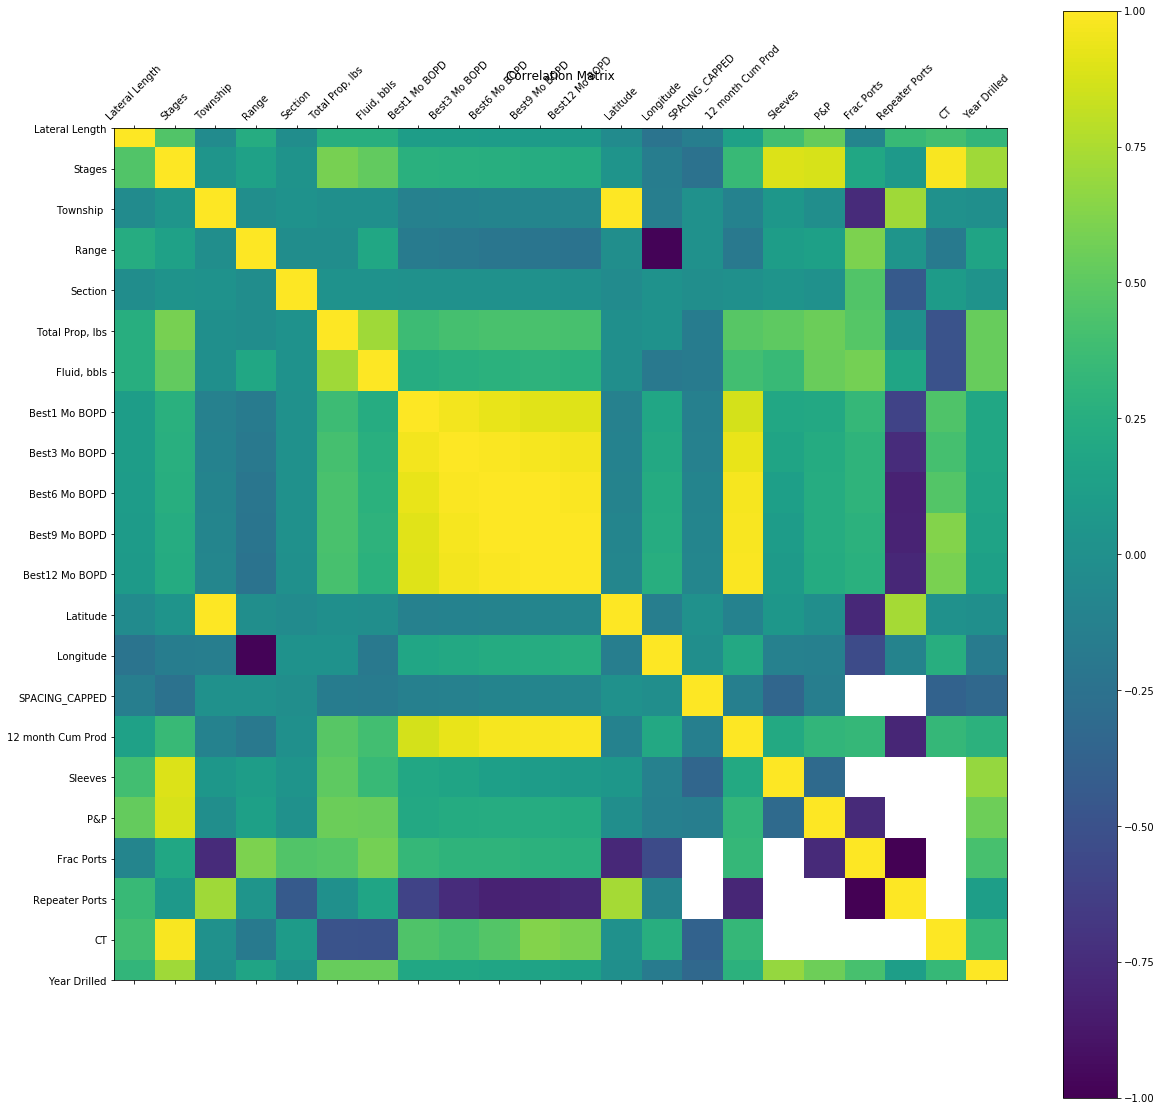

In [5]:
plot_corr(daDataframeT,20)                                      # using our correlation matrix visualization function
plt.show()

## Pair-wise scatterplot/histogram matrix
The next figure attempts to scout out interesting patterns between variables along with how the data from each of the variables is distributed through histograms(blue). by graphing every combination of scatterplot between two quantitative variables. More patterns (not particularly linear in nature) emerge, further categorical parsing of the data can potentially create more distinct relations between the variables as these variables are interrelated.

In [9]:
#  Plotting a Pair-wise scatterplot/histogram matrix

pd_plot.scatter_matrix(daDataframeT, alpha = 0.7,              # pandas matrix scatter plot
    figsize=(50, 50),color = 'black', hist_kwds={'color':['blue']})
plt.show()